In [89]:
# ! pip install qiskit==1.0.2 qiskit_aer pylatexenc

In [90]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, array_to_latex, plot_histogram
from qiskit.circuit.library import Initialize
from qiskit.quantum_info import random_statevector, Statevector
from qiskit.result import marginal_counts
from qiskit_aer import Aer, AerSimulator




from math import pi
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Latex object>

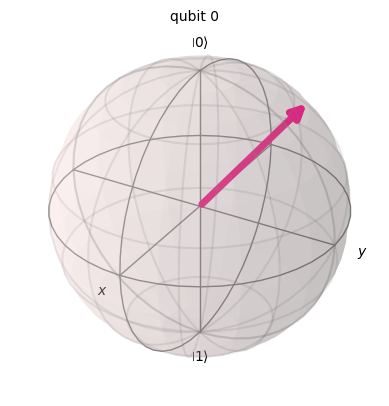

In [91]:
# Initializing random information for |q0>

psi = random_statevector(2)
init_gate = Initialize(psi)
init_gate.label = "ket-psi"
display(array_to_latex(psi, prefix="|\\psi\\rangle = "))
plot_bloch_multivector(psi)

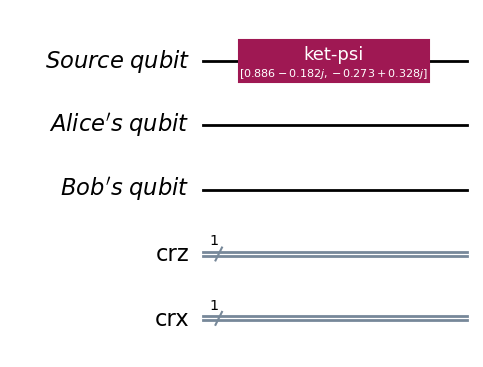

In [92]:
# Primary setup

data_q = QuantumRegister(1, name = "Source qubit")
alice_q = QuantumRegister(1, name = "Alice's qubit")
bob_q = QuantumRegister(1, name = "Bob's qubit")

crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')
ckt = QuantumCircuit(data_q, alice_q, bob_q, crz, crx)

# assigning ket-psi into |q0>
ckt.append(init_gate, [0])
# ckt.x()
# ckt.rz(pi, 0)

ckt.draw(output='mpl')

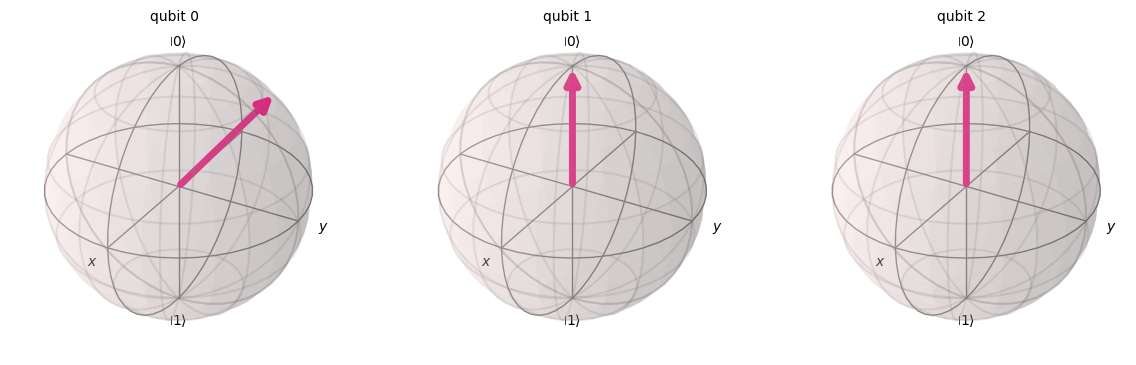

In [93]:
backend = Aer.get_backend('statevector_simulator')
ckt = transpile(ckt, backend)
job = backend.run(ckt).result()
statevector = job.get_statevector()
plot_bloch_multivector(statevector)

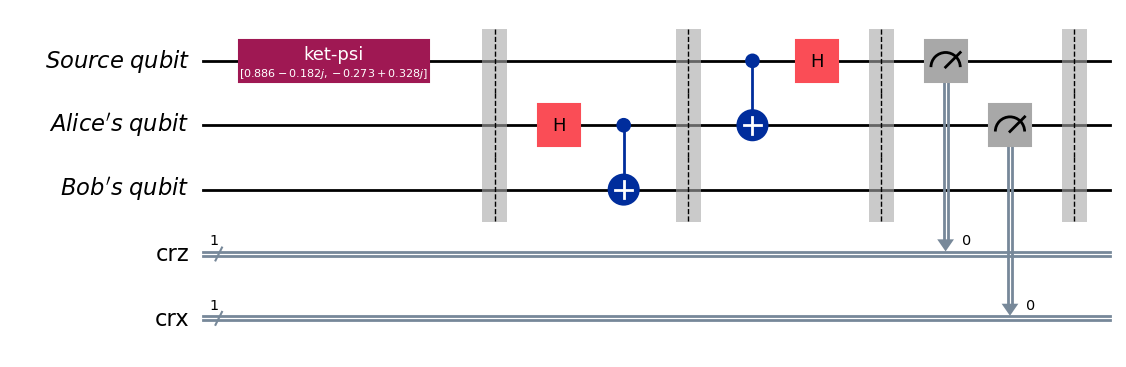

In [94]:
# EPR pair generation
ckt.barrier()
ckt.h(1)
ckt.cx(1,2)
ckt.barrier()

# Bell state projection on Alice's end
ckt.cx(0, 1)
ckt.h(0)
ckt.barrier()

# measurement
ckt.measure(0, crz)
ckt.measure(1, crx)
ckt.barrier()

ckt.draw(output='mpl')

crx crz:  {'1 1': 1}


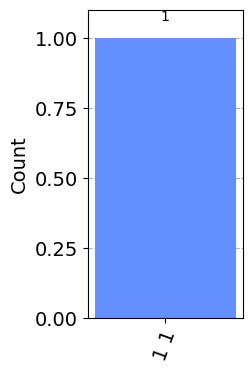

In [95]:
# Getting the measurement

simulator = AerSimulator()
compiled_ckt = transpile(ckt, simulator)
job = simulator.run(compiled_ckt, shots = 1)
result = job.result()
counts = result.get_counts()
print("crx crz: ",counts)
plot_histogram(counts, figsize=(2,4))

In [96]:
# Alice's message to Bob (The sequence is: crz crx)
msg = " "
for i,j in counts.items():
  msg = str(i)
msg[::-1]

'1 1'

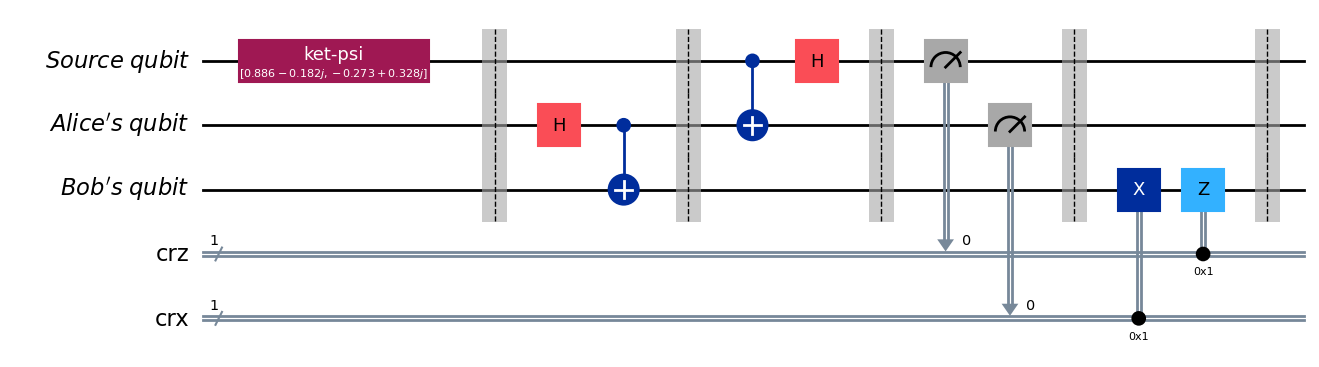

In [97]:
# Now, Bob's decoding on his end
ckt.x(bob_q[0]).c_if(crx, 1) # if crx = 1, Bob will perform Pauli-X on his qubit
ckt.z(bob_q[0]).c_if(crz, 1) # if crz = 1, Bob will perform Pauli-Z on his qubit
ckt.barrier()

ckt.draw(output='mpl')

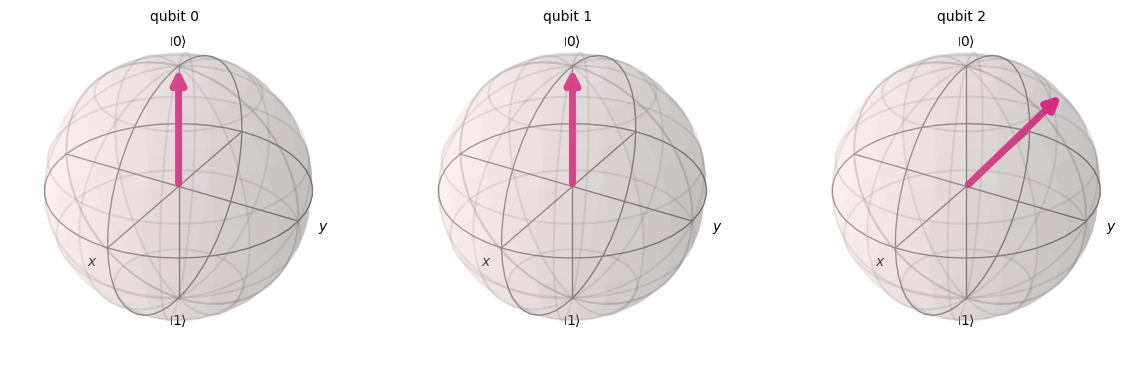

In [98]:
job = backend.run(ckt).result()
statevector = job.get_statevector()
plot_bloch_multivector(statevector)

Qubit 2 (Bob's qubit) bocomes the source information (qubit). Can't measure the qubit, or it will collapse. But we can verify from Bloch Sphere representation. We can see that the source qubit and the Bob's qubit(qubit 2) are identical. Hence we can say that the teleportation took place.

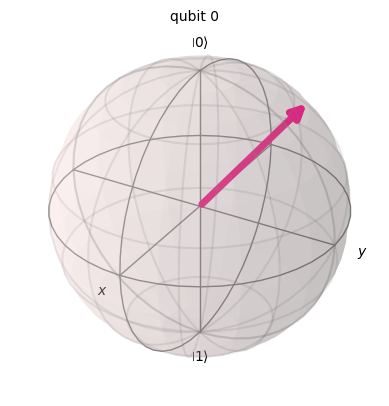

In [99]:
# Initial Source
plot_bloch_multivector(psi)

<img src="https://i.ibb.co/z6QRMnH/Quantum-Teleportation-drawio.png" alt="Quantum-Teleportation-drawio" border="0">

## **Analyzing Quantum Teleportation with Density Operator**

**Reference:  QC and QI by Nielson and Chuang, The reduced density operator - 2.4.3**

Here, Alice - A, Bob - B, Source info/qubit - $\psi_C$

- Step 1: $|ω_1⟩ = |0⟩|0⟩$

- Step 2: $|ω_2 = \frac{1}{\sqrt{2}}(|00⟩ + |11⟩)$

- Step 3: $|ω'⟩ = |\psi_c⟩ ⊗ |ω_2⟩$
Now, the Density of entire system becomes: $ρ_{ABC} = |ω_2⟩ \langleω_2|$. Let's trace out A and C to get what information Bob has:


$\rho_B = tr_A tr_C (\rho_{ABC})$

$= tr_A tr_C[(|\psi_c⟩ ⊗ |ω_2⟩) ⊗ (⟨\psi_c| ⊗ ⟨ω_2|)]$

$= tr_A[( tr_C|\psi_c⟩ ⊗ ⟨\psi_c|) ⊗ ( |ω_2\rangle ⊗ ⟨ω_2|)]$

$= tr_A[(⟨\psi_c|\psi_c⟩) ⊗ ( |ω_2\rangle ⊗ ⟨ω_2|)]$

$= tr_A[( |ω_2\rangle ⊗ ⟨ω_2|)]$

$= \frac{1}{2}tr_A[( |ω_2\rangle ⊗ ⟨ω_2|)]$

$= \frac{1}{2}tr_A[( |00\rangle + |11⟩) \otimes ( \langle00| + \langle11|)]$

$= \frac{1}{2}tr_A[( |0_A0_B\rangle + |1_A1_B⟩) \otimes ( \langle0_A0_B| + \langle1_A1_B|)]$

$= \frac{1}{2}[( \langle0_A|0_A\rangle |0_B⟩ ⊗ ⟨0_B|) + ( \langle1_A|1_A\rangle |1_B⟩ ⊗ ⟨1_B|)]$

$= \frac{1}{2}[(|0_B⟩ ⊗ ⟨0_B|) + (|1_B⟩ ⊗ ⟨1_B|)]$

$= \frac{𝕀}{2}$

- Step 4: After Alice performs Bell state projection on her part and the source qubit, the mixed state becomes: $|ω_3⟩ = \frac{1}{2}[|00⟩(α|0⟩+β|1⟩) + |11⟩(α|1⟩-β|0⟩) + |01⟩(α|1⟩+β|0⟩) + |10⟩(α|0⟩-β|1⟩)]$

Here, 00, 01, 10, and 11s are all Alice's probable outcome with each probability of $\frac{1}{4}$. The Density matrix for this entire system will be:

$|\rho⟩ = \frac{1}{4}[|00⟩⟨00|(α|0⟩+β|1⟩)(α^*\langle0|+β^*\langle1|)$

$+|01⟩⟨01|(α|1⟩+β|0⟩)(α^*\langle1|+β^*\langle0|)$

$+|10⟩⟨10|(α|0⟩-β|1⟩)(α^*\langle0|-β^*\langle1|)$

$+|11⟩⟨11|(α|1⟩-β|0⟩)(α^*\langle1|-β^*\langle0|)]$

By tracing out Alice's part we will get Bob's part.

$|\rho_B⟩ = \frac{1}{4}[(α|0⟩+β|1⟩)(α^*\langle0|+β^*\langle1|)$

$+(α|1⟩+β|0⟩)(α^*\langle1|+β^*\langle0|)$

$+(α|0⟩-β|1⟩)(α^*\langle0|-β^*\langle1|)$

$+(α|1⟩-β|0⟩)(α^*\langle1|-β^*\langle0|)]$

$= \frac{1}{4}(\begin{bmatrix}
  α\\
  β
\end{bmatrix} \begin{bmatrix}
  α^* & β^*
\end{bmatrix} +
\begin{bmatrix}
  β\\
  α
\end{bmatrix}\begin{bmatrix}
  β^* & α^*
\end{bmatrix}+
\begin{bmatrix}
  α\\
  -β
\end{bmatrix} \begin{bmatrix}
  α^* & -β^*
\end{bmatrix}+
\begin{bmatrix}
  -β\\
  α
\end{bmatrix}\begin{bmatrix}
  -β^* & α^*
\end{bmatrix}
)$

$ = \frac{1}{4}\begin{bmatrix}
  2 & 0\\
  0 & 2
\end{bmatrix}$

$ = \frac{1}{2}\begin{bmatrix}
  1 & 0\\
  0 & 1
\end{bmatrix}$

$= \frac{𝕀}{2}$

- Step 5: Finally, when Bob perform's Unitary operation, he decodes and gets the source information $|ψ_C⟩$. At this stage, $ρ_B = |ψ_C⟩ ⟨ψ_C|$, which represents the successfull teleportation of unknown state $|ψ_C⟩$.

## Does the teleportation happen to be faster than light?

No, from above (step 4), we saw that even after Alice performs Bell state projection on her part and the source qubit, Bob does not have the source information. The teleportation won't happen until and unless Bob performs the Unitary operation. Besides, Alice uses a classical channel/medium to send her measurement result to Bob.